## 1. TV, halftime shows, and the Big Game

Whether or not you like football, the Super Bowl is a spectacle. There's a little something for everyone at your Super Bowl party. Drama in the form of blowouts, comebacks, and controversy for the sports fan. There are the ridiculously expensive ads, some hilarious, others gut-wrenching, thought-provoking, and weird. The half-time shows with the biggest musicians in the world, sometimes riding giant mechanical tigers or leaping from the roof of the stadium. It's a show, baby. And in this notebook, we're going to find out how some of the elements of this show interact with each other. After exploring and cleaning our data a little, we're going to answer questions like:

    What are the most extreme game outcomes?
    How does the game affect television viewership?
    How have viewership, TV ratings, and ad cost evolved over time?
    Who are the most prolific musicians in terms of halftime show performances?

In [4]:
import pandas as pd

# Load the CSV data into DataFrames
super_bowls = pd.read_csv('super_bowls.csv')
tv = pd.read_csv('tv.csv')
halftime_musicians = pd.read_csv('halftime_musicians.csv')

# Display the first five rows of each DataFrame
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## 2. Taking note of dataset issues

For the Super Bowl game data, we can see the dataset appears whole except for missing values in the backup quarterback columns (qb_winner_2 and qb_loser_2), which make sense given most starting QBs in the Super Bowl (qb_winner_1 and qb_loser_1) play the entire game.

From the visual inspection of TV and halftime musicians data, there is only one missing value displayed, but I've got a hunch there are more. The Super Bowl goes all the way back to 1967, and the more granular columns (e.g. the number of songs for halftime musicians) probably weren't tracked reliably over time. Wikipedia is great but not perfect.

An inspection of the .info() output for tv and halftime_musicians shows us that there are multiple columns with null values.

In [5]:
# Summary of the TV data to inspect
tv.info()

print('\n')

# Summary of the halftime musician data to inspect
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: 

In [11]:
print(tv.shape)
tv.isna().sum()


(53, 9)


super_bowl           0
network              0
avg_us_viewers       0
total_us_viewers    38
rating_household     0
share_household      0
rating_18_49        38
share_18_49         47
ad_cost              0
dtype: int64

In [12]:
print(halftime_musicians.shape)
halftime_musicians.isna().sum()

(134, 3)


super_bowl     0
musician       0
num_songs     46
dtype: int64

We can see that we have a significant non value

### 3. Combined points distribution

For the TV data, the following columns have missing values and a lot of them:

    total_us_viewers (amount of U.S. viewers who watched at least some part of the broadcast)
    rating_18_49 (average % of U.S. adults 18-49 who live in a household with a TV that were watching for the entire broadcast)
    share_18_49 (average % of U.S. adults 18-49 who live in a household with a TV in use that were watching for the entire broadcast)
    
For the halftime musician data, there are missing numbers of songs performed (num_songs) for about a third of the performances.

There are a lot of potential reasons for these missing values. Was the data ever tracked? Was it lost in history? Is the research effort to make this data whole worth it? Maybe. Watching every Super Bowl halftime show to get song counts would be pretty fun. But we don't have the time to do that kind of stuff now! Let's take note of where the dataset isn't perfect and start uncovering some insights.

Let's start by looking at combined points for each Super Bowl by visualizing the distribution. Let's also pinpoint the Super Bowls with the highest and lowest scores.

In [15]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


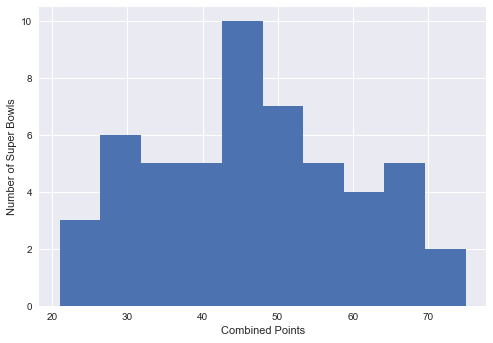

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

plt.hist(super_bowls.combined_pts)
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])